In [1]:
import numpy as np
import matplotlib.pyplot as plt  

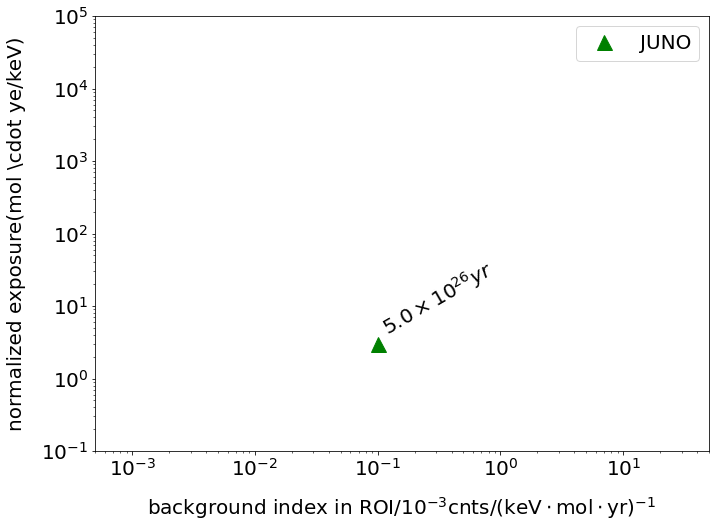

In [2]:
xdata1 = 0.1
ydata1 = 3

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
data1 = ax.plot(xdata1,ydata1,'g^',markersize=15,label='JUNO')
ax.text(0.1,4,'$ 5.0 \\times 10^{26}yr$',rotation=30,size=20)

#Some settings about the coordinate axis
font = {'family' : 'DejaVu Sans','weight':'normal','size':20}
ax.set_xlabel('background index in ROI/$10^{-3}$cnts/$\\rm (keV \cdot mol \cdot yr)^{-1}$',labelpad = 15,size=20)
ax.set_xlim([0.5e-3,50])
ax.set_xscale('log')
ax.tick_params(labelsize=20)


ax.set_ylabel('normalized exposure(mol \cdot ye/keV)',labelpad = 15,size =20)
ax.set_ylim([1e-1,1e5])
ax.set_yscale('log')
ax.legend(prop=font)
